Exploring the Response Variable and Concluding the Initial Exploration

SCIKIT LEARN AND MODEL EVALUATION

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#next line helps with plot rendition

%matplotlib inline
import matplotlib as mpl #add'1 plotting functionality
mpl.rcParams['figure.dpi']=400 #high res figures

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\python\FEBRUARYMARCH PYTHON.csv")

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [4]:
#PROPORTION OF THE POSITIVE CLASS
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

#there is imbalance as the ratio of 1 and 0 is at a 22: 78 not a balance of 50:50 we can use over sampling or under sampling. however bare in mind that this is representative of real life as in such cases positives are usually less than negatives. one will expect faulters tobe less that non defaukters. 

LETS GET INTO SCIKIT-LEARN
FIRST WE USE AN ALREADY EXISTENT MODEL: LOGISTIC REGRESSION
INSTANTIATE(TAKE A BLUEPRINT OF THE MODEL FROM SKLEARN AND MAKE AN OBJECT OF IT) IT FROM THE CLASS PROVIDED BY SCIKIT
WE CAN THEN TRAIN THIS OBJECT ON OUR DATA AND SAVE FOR LATER USE

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
my_lr = LogisticRegression()

In [8]:
my_lr

LogisticRegression()

In [9]:
my_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [10]:
#PARAMETER TUNING
my_new_lr = LogisticRegression( C = 1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1,
                               l1_ratio= None, max_iter= 100, multi_class = 'auto', n_jobs = None, penalty= 'l2', random_state=None,
                               solver= 'lbfgs', tol= 0.0001, verbose= 0, warm_start= False)

In [11]:
my_new_lr.C= 0.1
my_new_lr.solver='liblinear'
my_new_lr.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
#FIT AND PREDICT ON MODEL
x= df['EDUCATION'][0:10].values.reshape(-1,1)

In [13]:
x

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [14]:
y= df['default payment next month'][0:10].values

In [15]:
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

LETS NOW USE THIS DATA TO FIT OUR LOGISTIC REGRESSION


In [16]:
my_new_lr.fit(x,y)

LogisticRegression(C=0.1, solver='liblinear')

In [17]:
new_x = df['EDUCATION'][10:20].values.reshape(-1,1)

In [18]:
new_x

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [19]:
#PREDICTING Y BASED ON X
my_new_lr.predict(new_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
my_new_lr.predict(new_x)==df['default payment next month'][10:20].values

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True])

In [22]:
np.random.seed(seed=1)
X= np.random.uniform(low=0.0, high= 10.0, size = (1000))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

1. CREATE RANDOM SEED
2. DECLARE VARIABLES FOR SLOPE AND INTERCEPT
3. CREATE THE THE RESPONSE VARIABLE USING THE FAMILIAR EQUATION FOR A LINE, WITH THE ADDITION OF SOME GAUSSIAN NOISE
: AN ARRAY OF 1000, SAME SIZE AND SHAPE AS FEATURE ARRAY, WHERE THE MEAN(LOC) IS 0 AND SD(SCALE) IS 1

In [23]:
np.random.seed(seed=1)
slope=0.25
intercept =  -1.25
y= slope*X + intercept + np.random.normal(loc=0, scale=1, size=(1000))

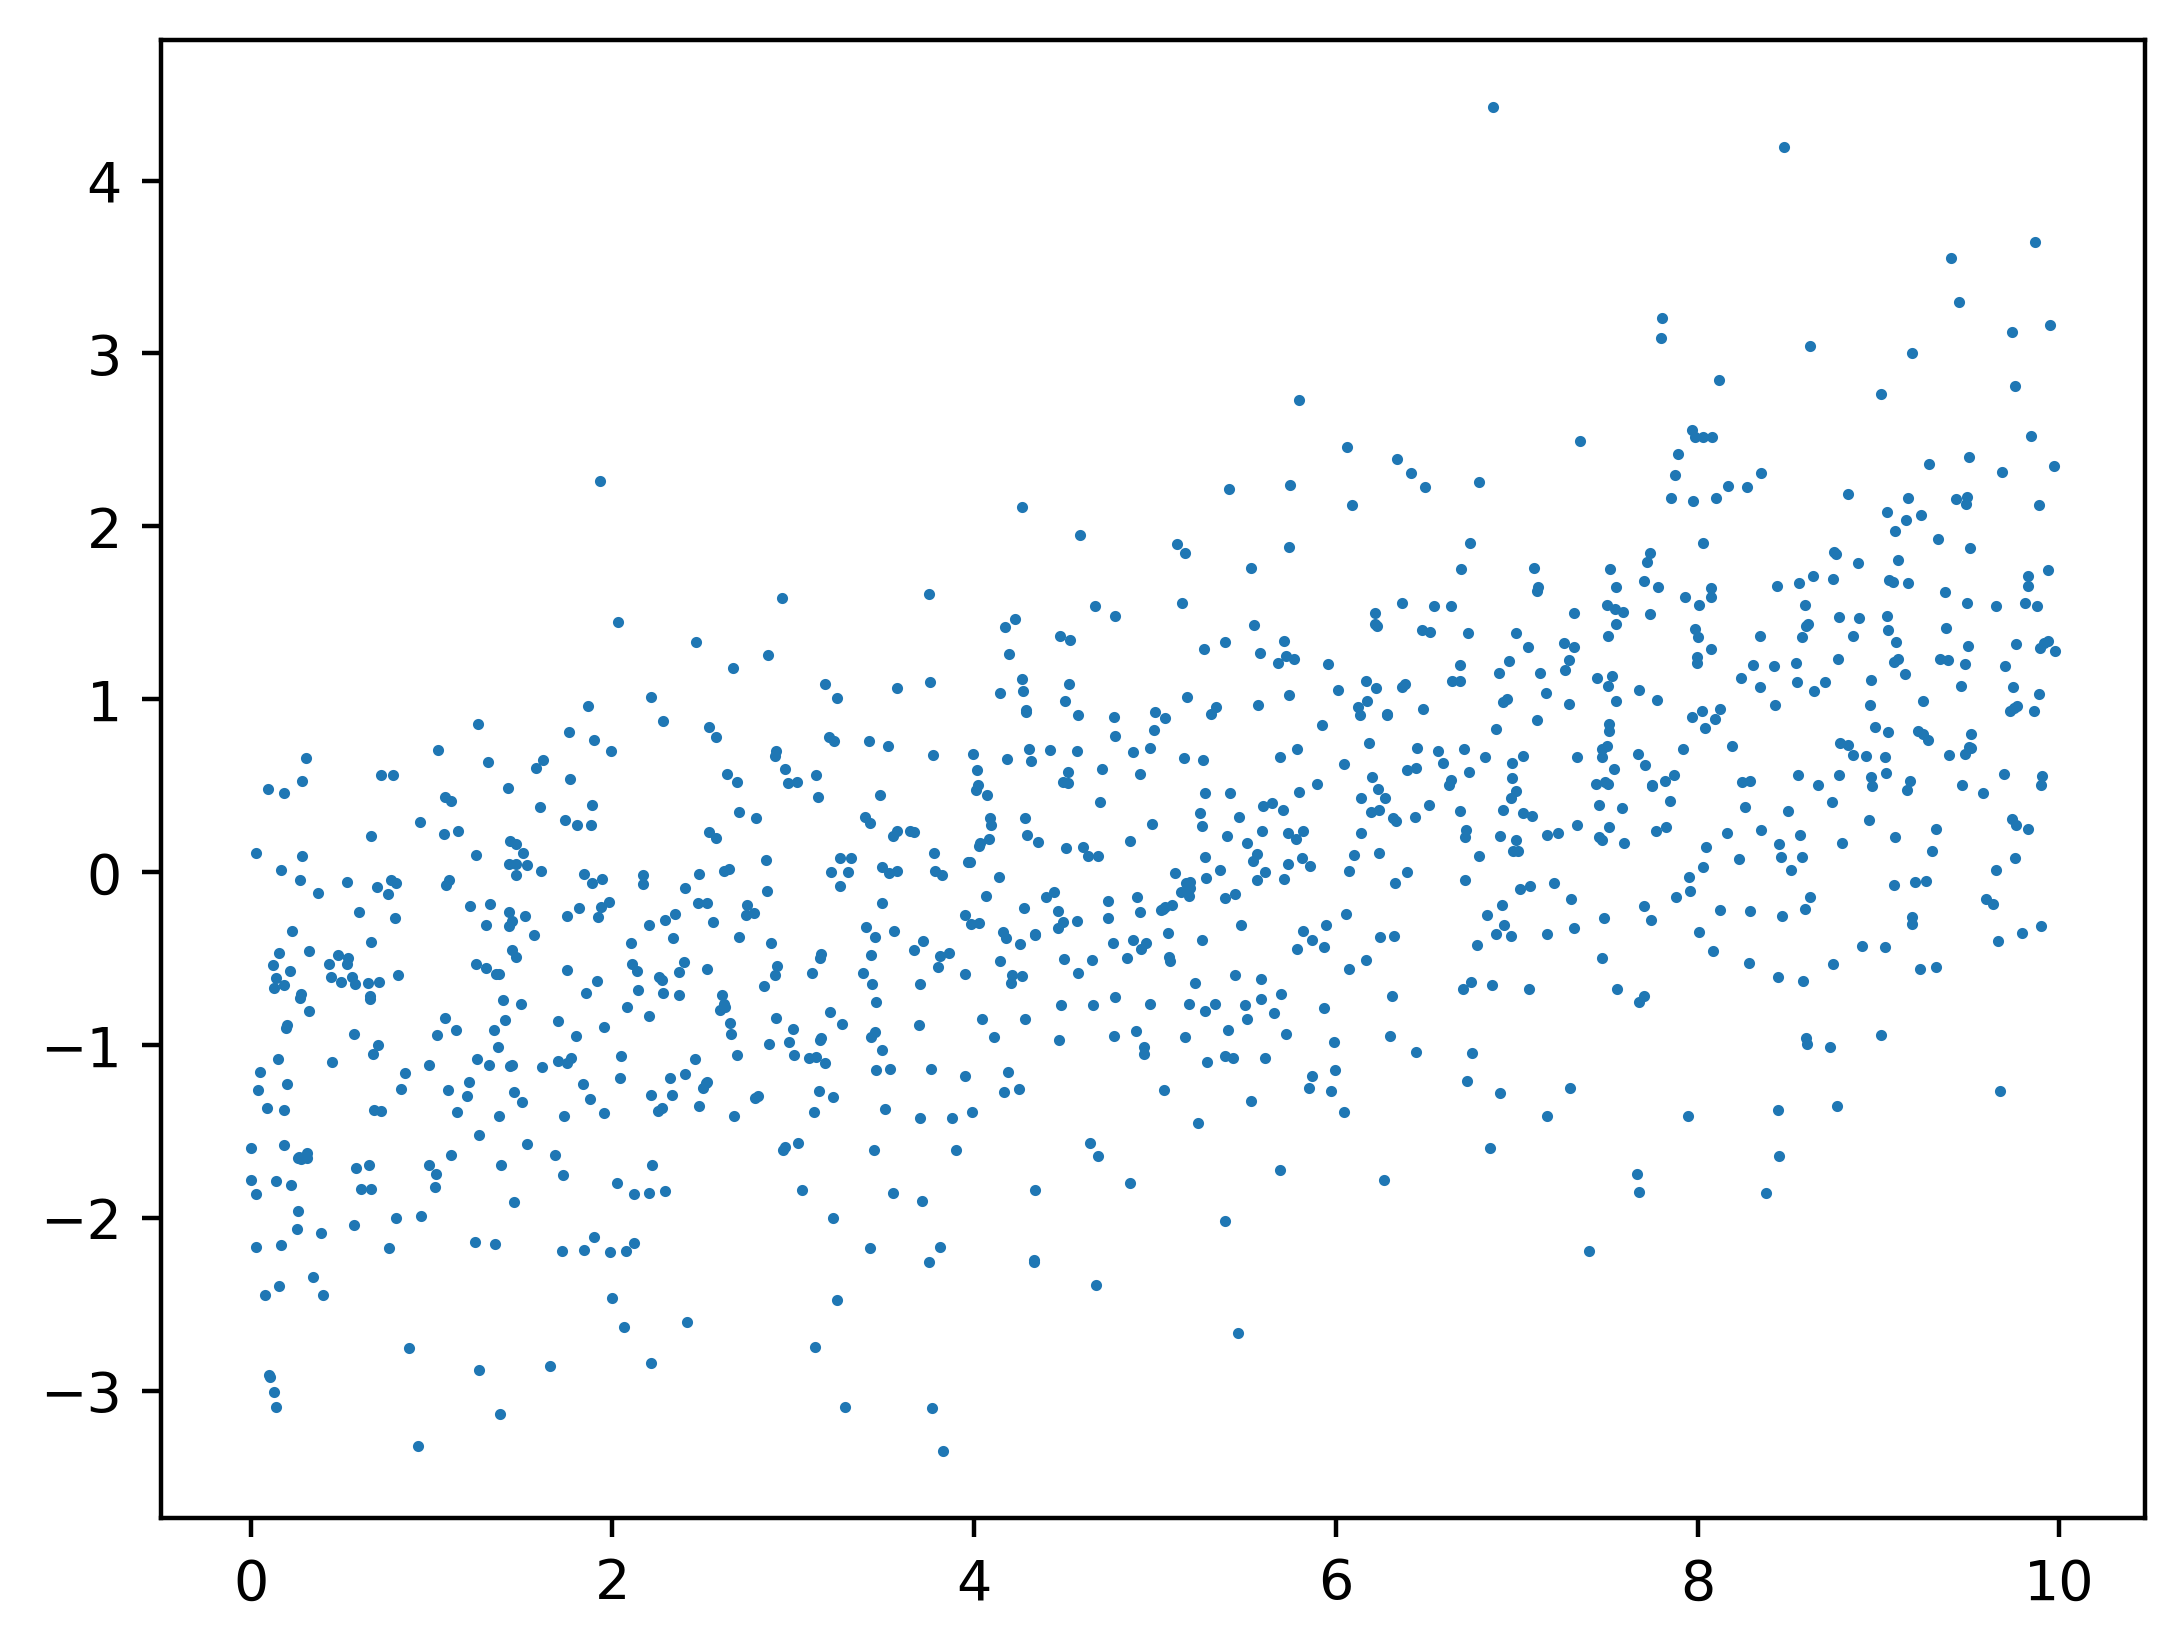

In [24]:
#lets visualize 
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1) #s is dot size

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg

LinearRegression()

In [26]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [27]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)


-1.1612566002825888
[0.24002588]


In [28]:
y_pred= lin_reg.predict(X.reshape(-1,1))

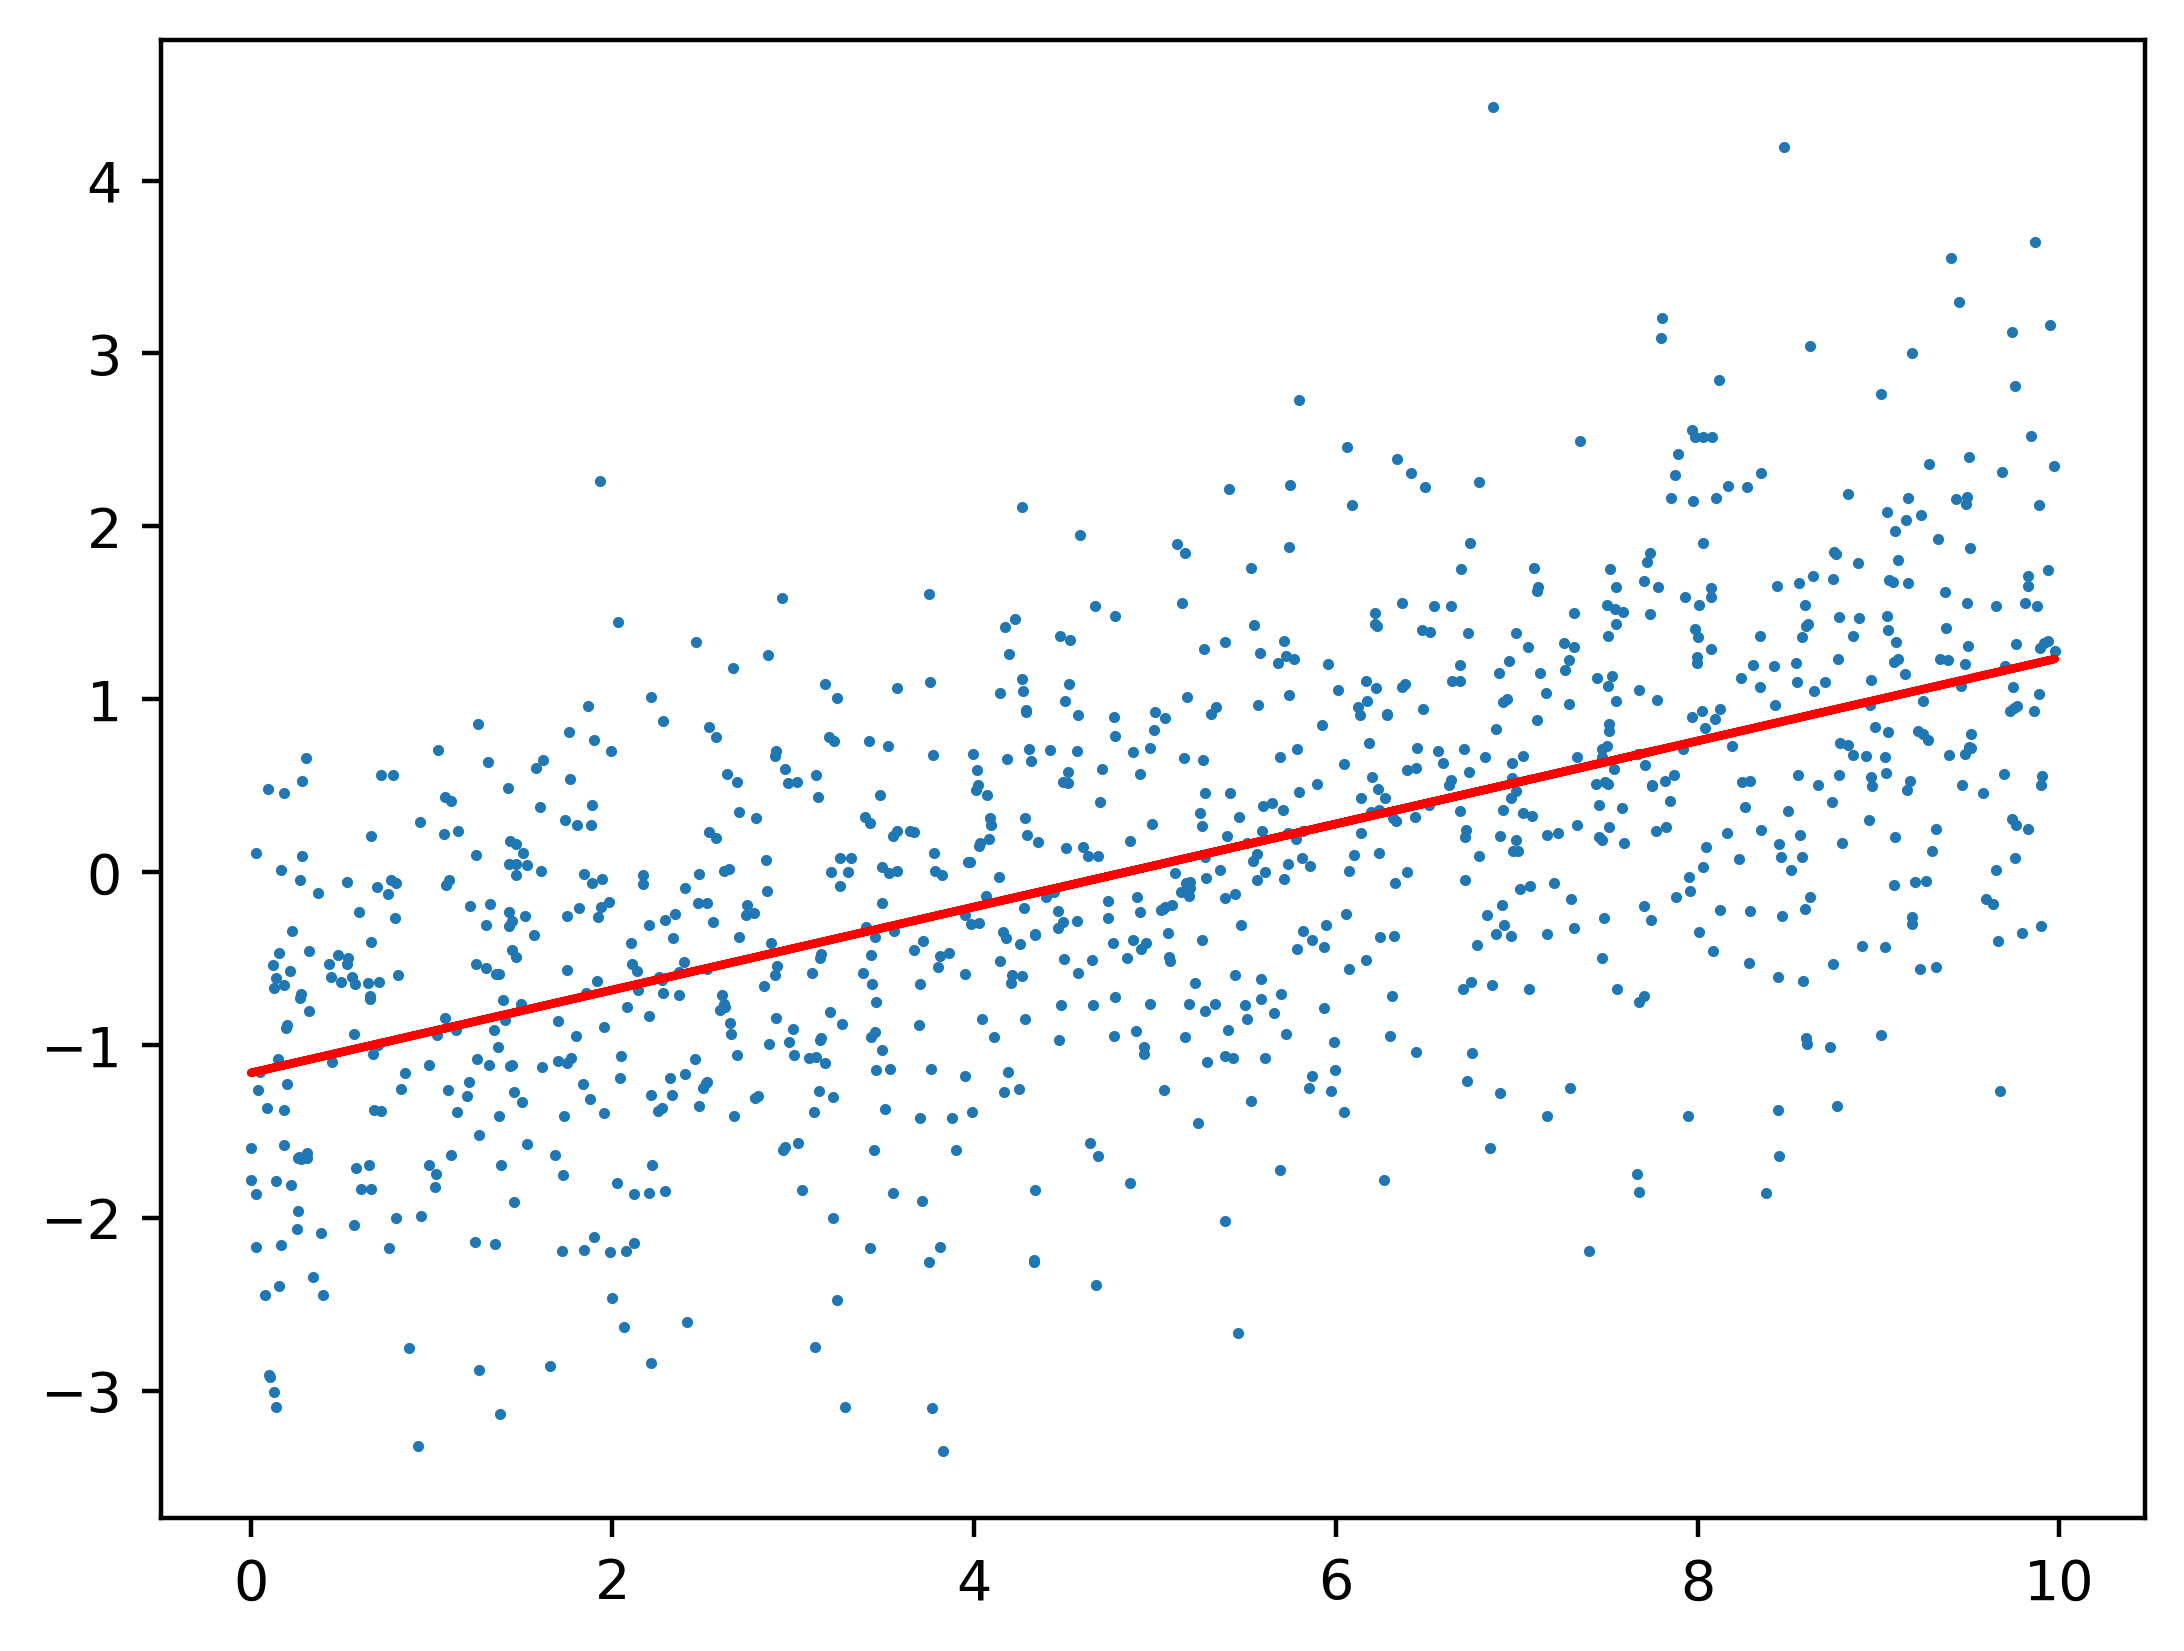

In [29]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred, 'r') #r= PLOT FORMAT FOR RED LINE

SPLITTING OUR DATASET INTO TRAIN AND TEST

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size= 0.2, random_state = 24)

THE SHAPE OF TRAINING AND TESTING DATA

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [32]:
np.mean(y_train)

0.223102526838873

In [33]:
np.mean(y_test)

0.21657603600225014

In [34]:
from sklearn.linear_model import LogisticRegression
example_lr=LogisticRegression()
example_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
example_lr.C=0.1
example_lr.solver='liblinear'
example_lr

LogisticRegression(C=0.1, solver='liblinear')

In [36]:
#TRAIN MODEL
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [37]:
#PREDICTION
y_pred = example_lr.predict(X_test)

In [38]:
#COMPARE/CALCULATE ACCURACY
is_correct = y_pred == y_test
np.mean(is_correct)


0.7834239639977498

In [39]:
#MODEL IS 78% ACCURATE
#method 2 using scikit learn: using the trained models.score method
example_lr.score(X_test, y_test) 

0.7834239639977498

In [40]:
#ACCURACY SCORE METRICS
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)

0.7834239639977498

CALCULATING THE TRUE AND FALSE NEGATIVES AND POSITIVES


In [41]:
#CALCULATING TPR
P=sum(y_test)
P

1155

In [42]:
TP = sum((y_test == 1) & (y_pred==1))
TP

0

In [43]:
TPR = TP/P
TPR

0.0

In [44]:
FN = sum(( y_test == 1) & (y_pred==0))
FN

1155

In [45]:
FNR = FN/P
FNR

1.0

MODEL HAS INFACT ACTED AS A MAJORITY CLASS NULL MODEL
EVERY POSITIVE SAMPLE WAS PREDICTED TO BE NEGATIVE SO NONE OF THEM WERE CORERECTLY PREDICTED

FIND THE TNR AND FPR OF TESTING DATA

In [46]:
TN= sum(y_test==0)
TN


4178

In [47]:
N= sum((y_test ==0) & (y_pred==0))
N

4178

In [48]:
FP = sum((y_test==0) & (y_pred==1))
FP

0

In [49]:
TNR=TN/N
FPR=FP/N
print('the true negative rate is {}, the false positive rate is {}' .format(TNR, FPR))

the true negative rate is 1.0, the false positive rate is 0.0


In [50]:
#CREATE A CONFUSION MATRIX IN SCIKIT LEARN 
metrics.confusion_matrix(y_test,y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

OBTAINING PREDICTED PROBABILITIES FROM A TRAINED LOGISTIC REGRESSION MODEL UDING SCIKIT LEARNS .PREDICT_PROBA

In [51]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [52]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [53]:
#ALL 1'S, CHECKING.
prob_sum.shape

(5333,)

In [54]:
np.unique(prob_sum)

array([1.])

SINCE CLASS PROBABILITIES SUM UP TO 1 FOCUS ON SECOND  COLUMN: THE PREDSICTED PROBABILITY OF THE POSITIVE CLASS MEMBERSHIP

In [55]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

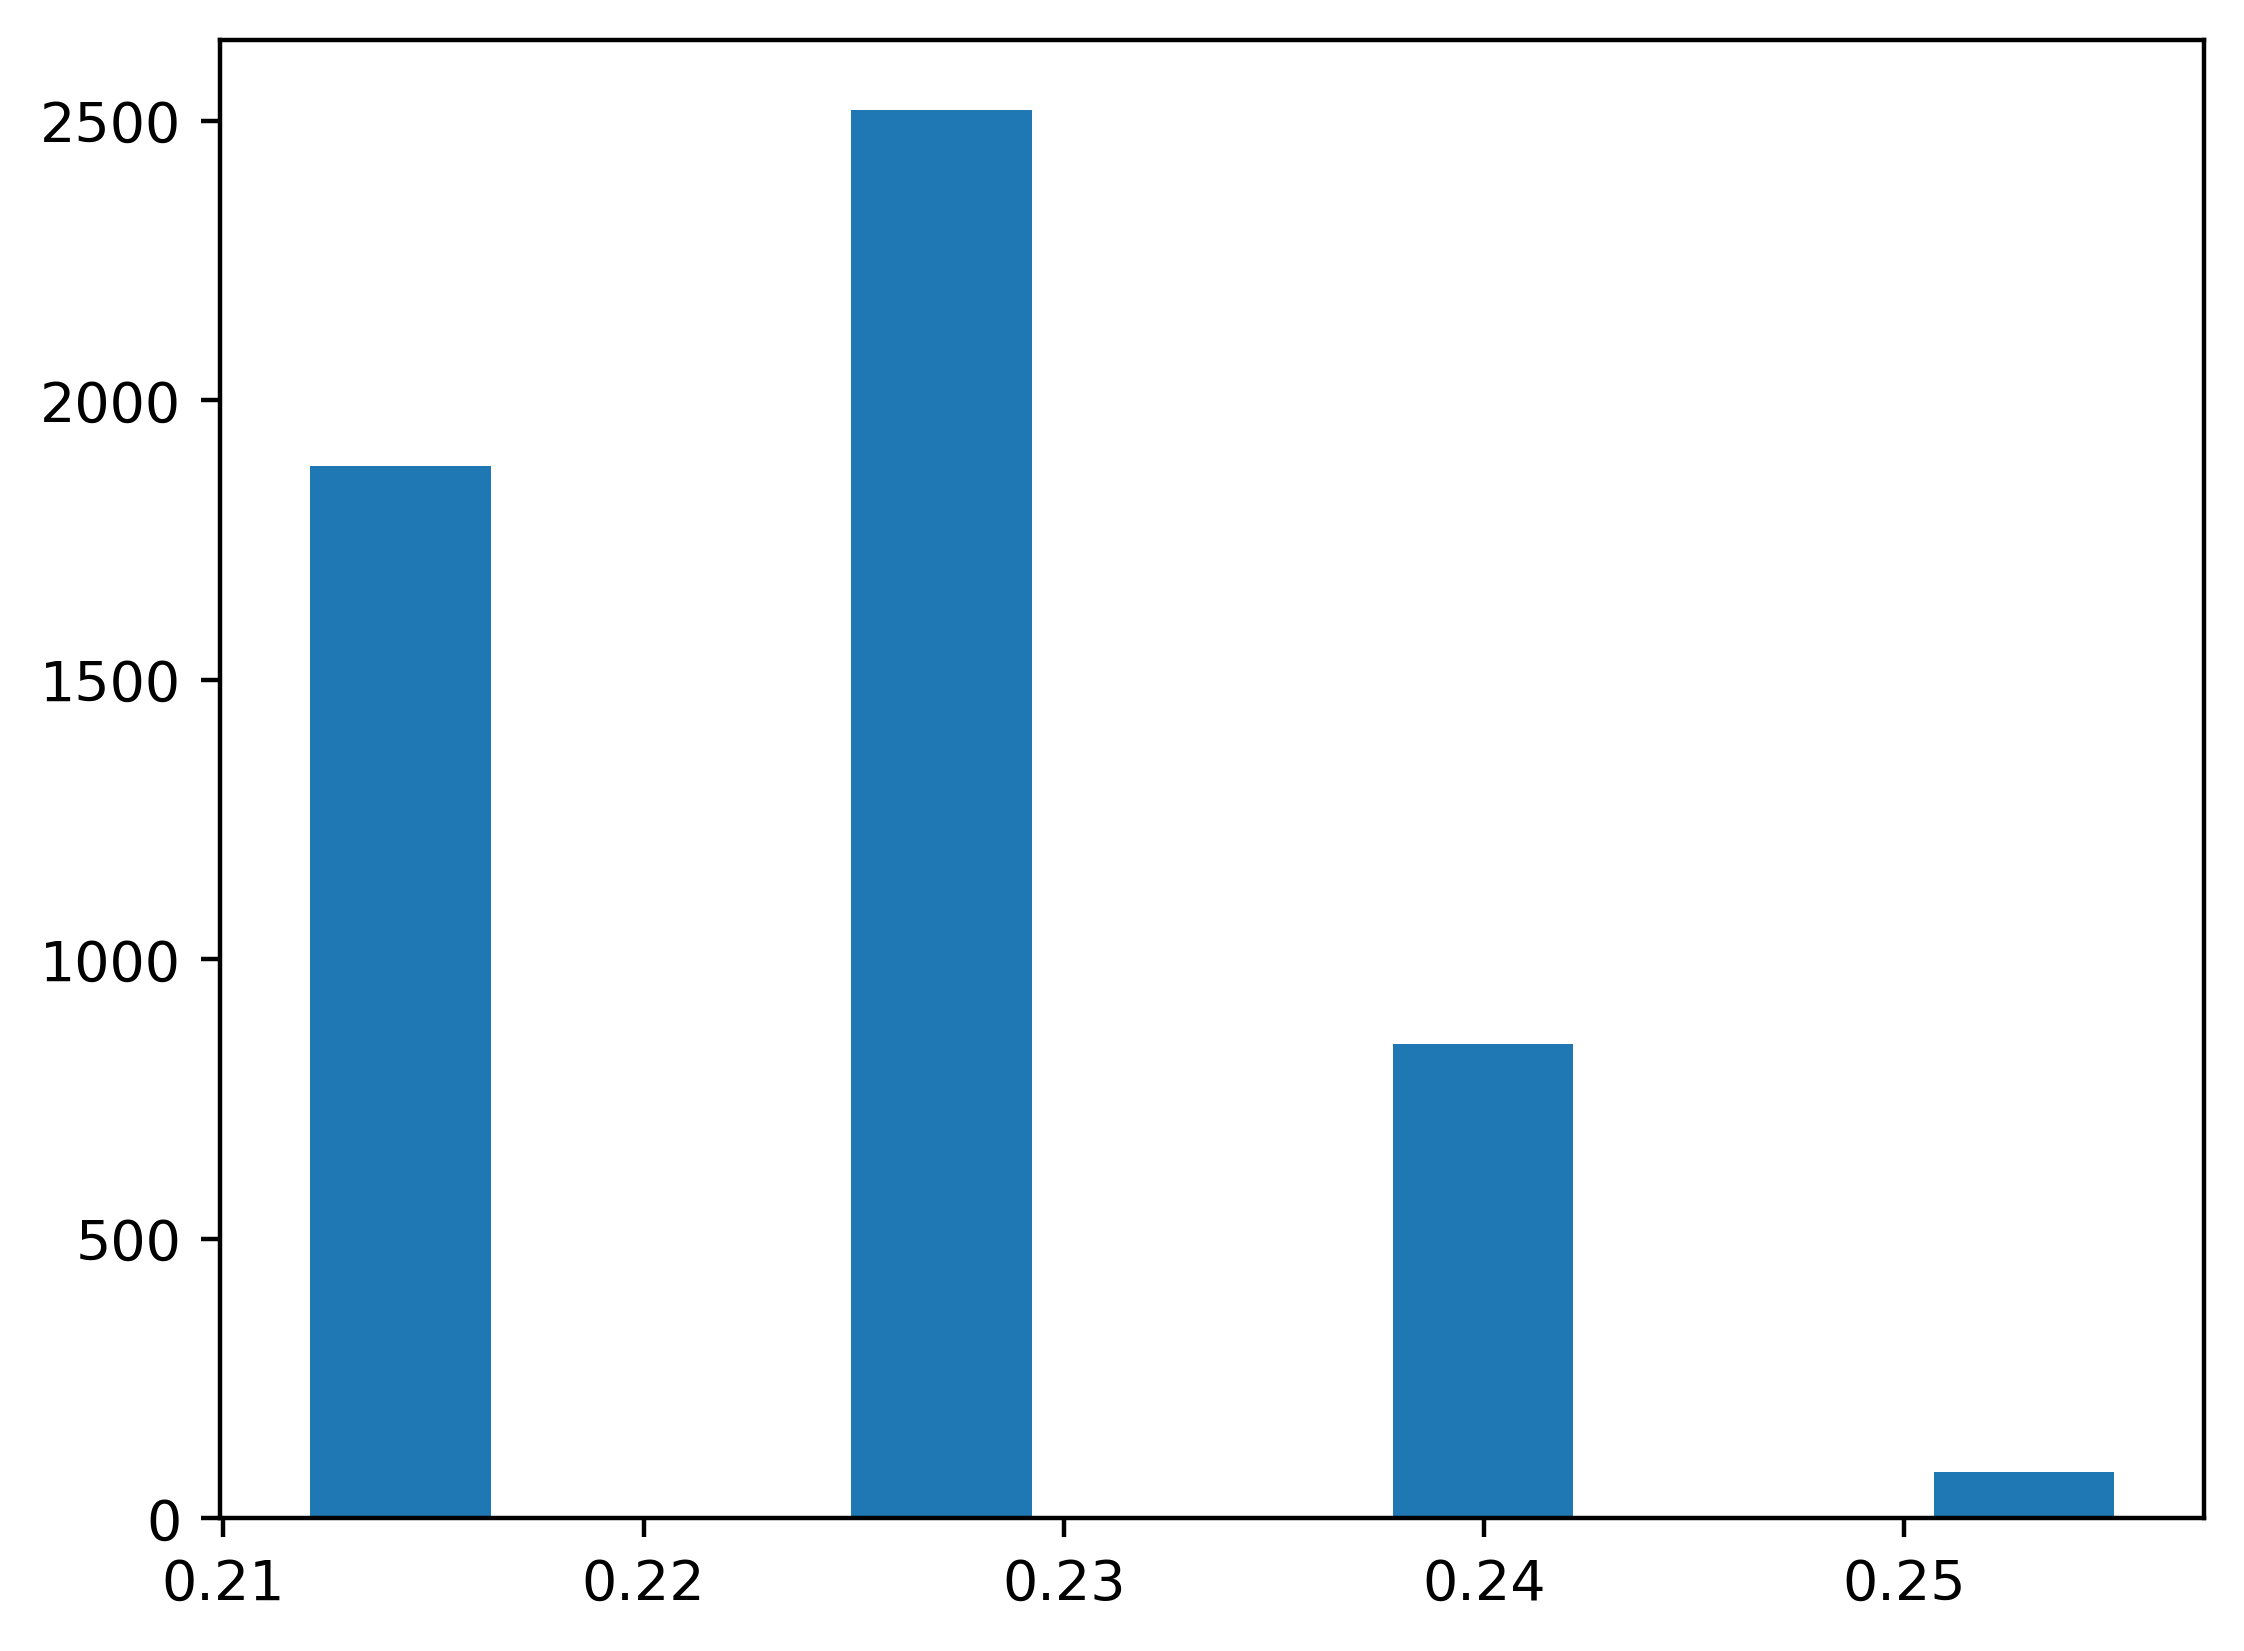

In [56]:
#HISTOGRAM OF PROBABILITIES
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

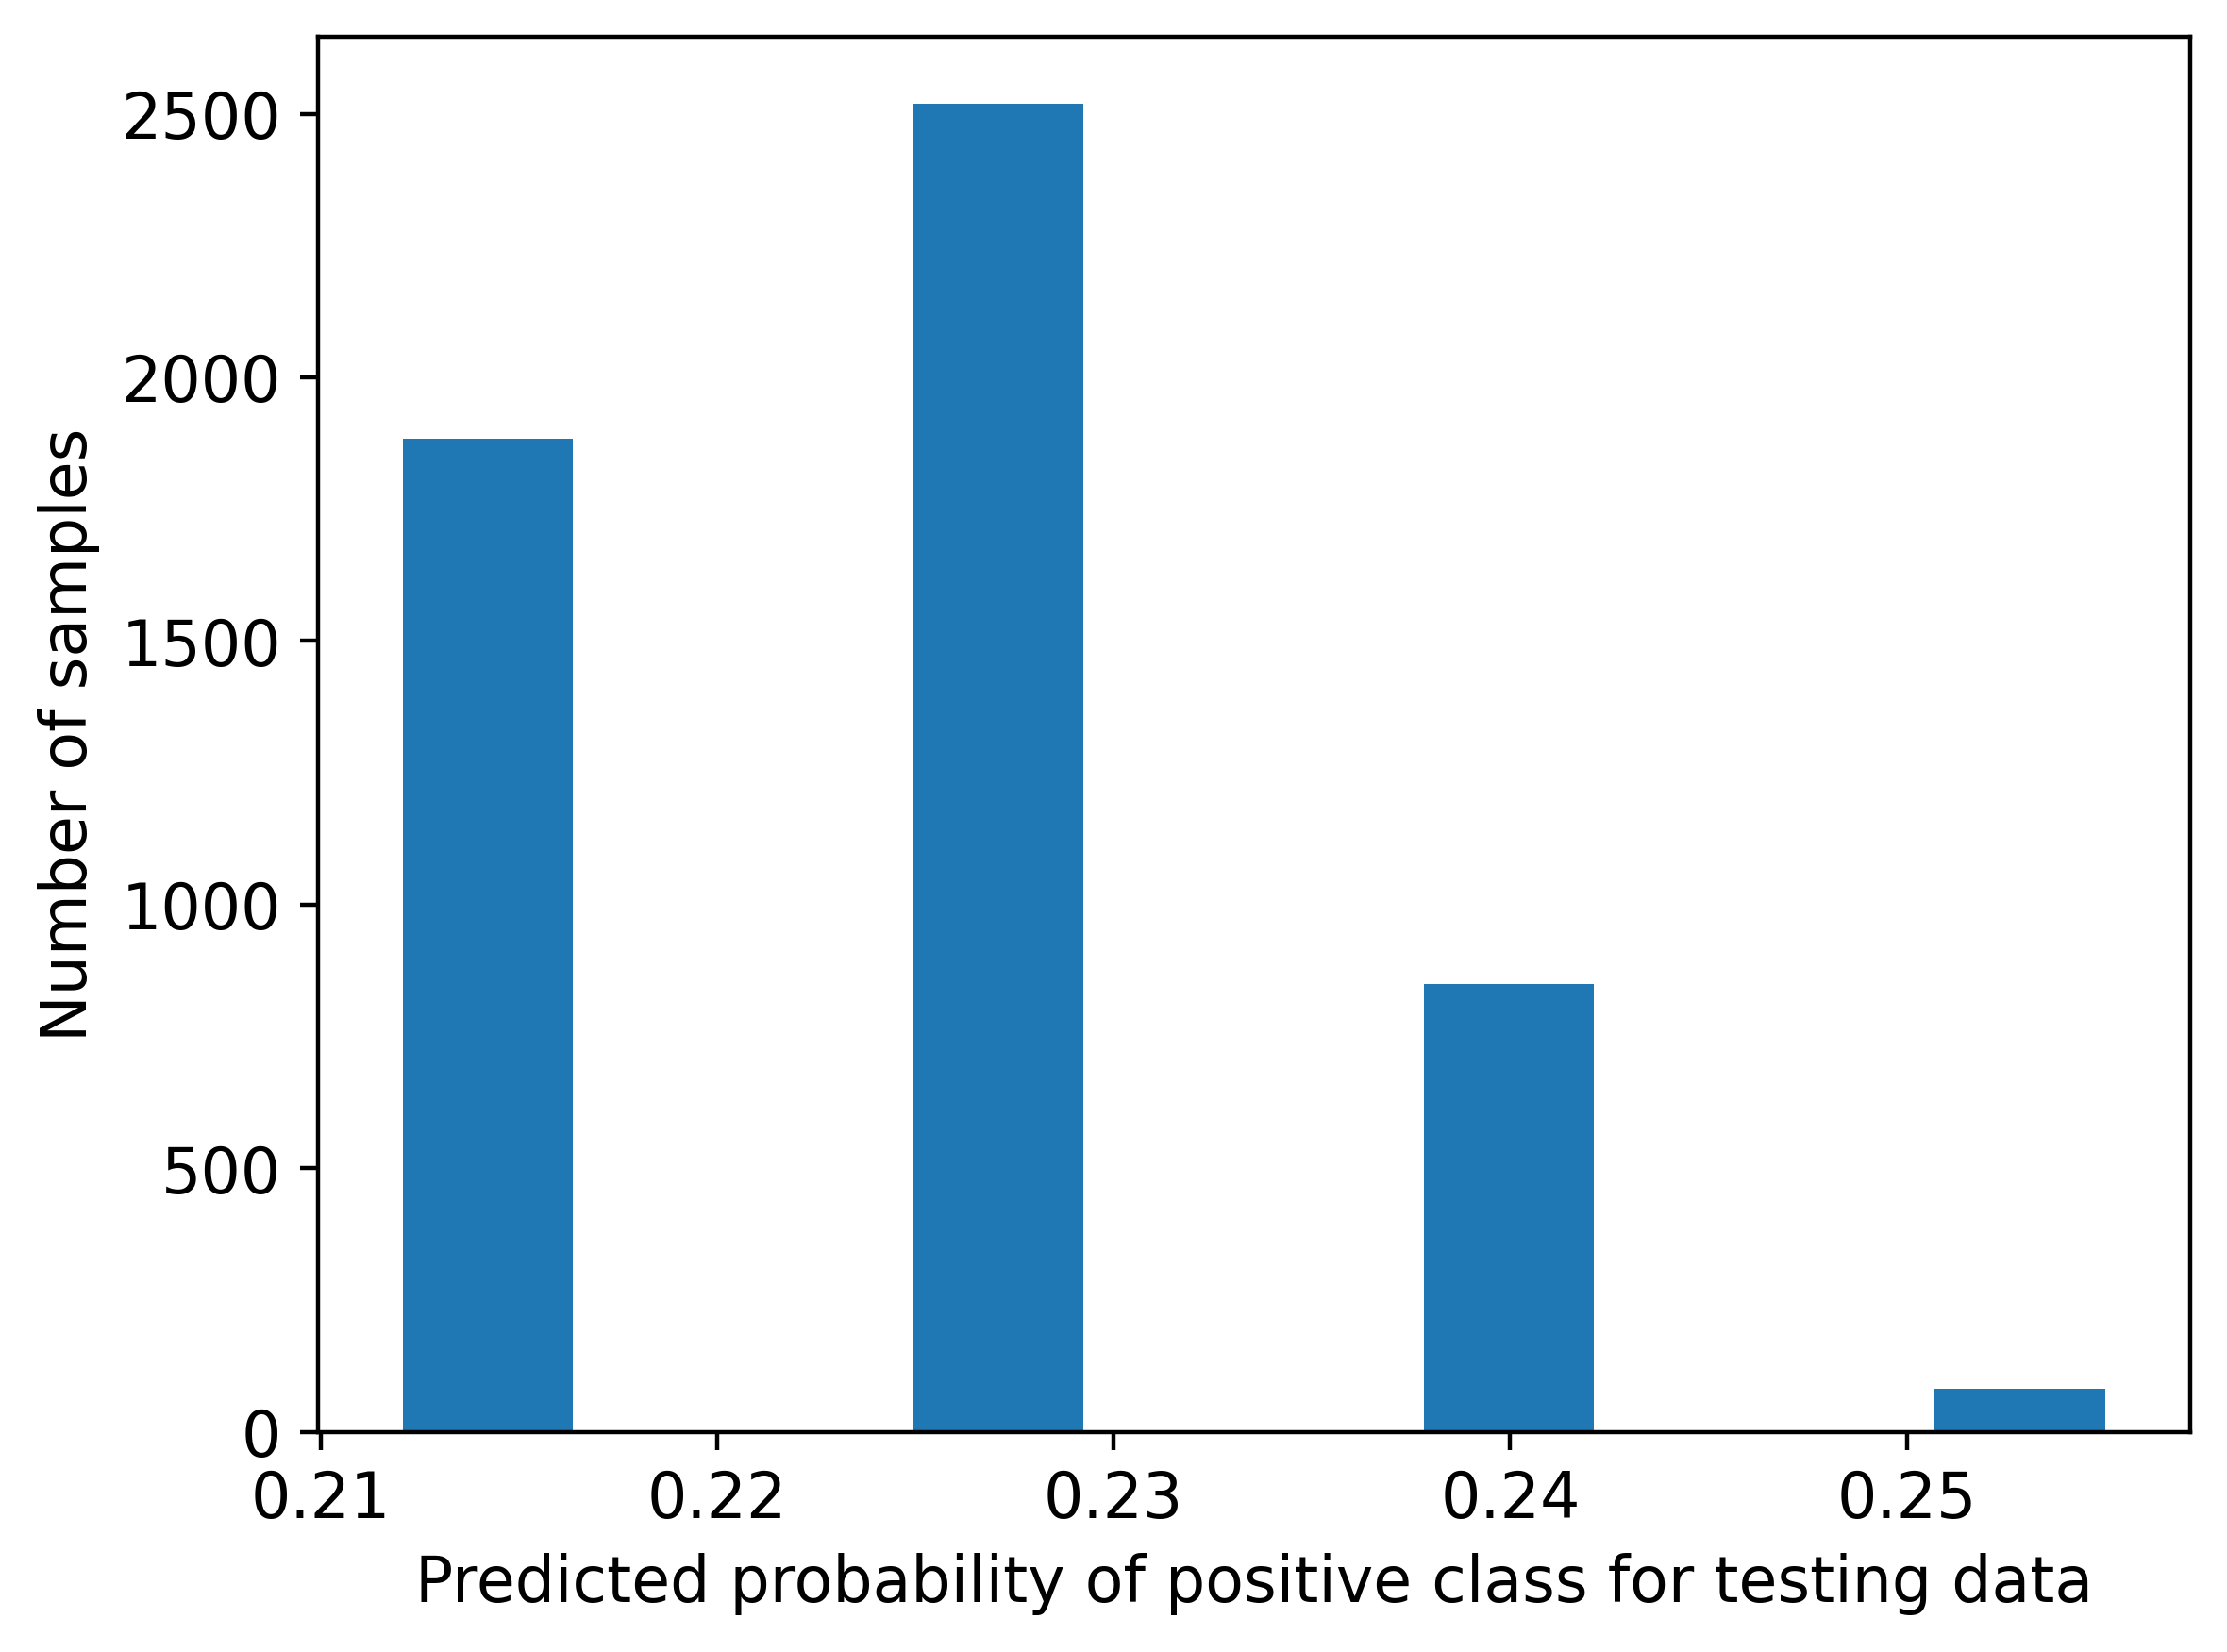

In [57]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

ALL VALUES ARE LESS THAN 0.5 WHICH IS SCIKITRLEARN DEFAULT THRESHOLD VALUE THUS ALL POSITIVES WERE PREDICTED AS NEGATIVE


VISUALIZE HOW MANY SAMPLES HAD POSITIVE LABELS. LOWER THRESHOLD TO O.25 TO IMPROVE MODEL

In [58]:
#VISUALIZE USING A STACKED HISTOGRAMS
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

In [59]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],
histtype= 'barstacked')
plt.legend(['Positive Samples', 'Negative Samples'])
plt.xlabel(['Predicted probability of positive class'])
plt.ylabel(['Number of samples'])

Text(0, 0.5, "['Number of samples']")

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

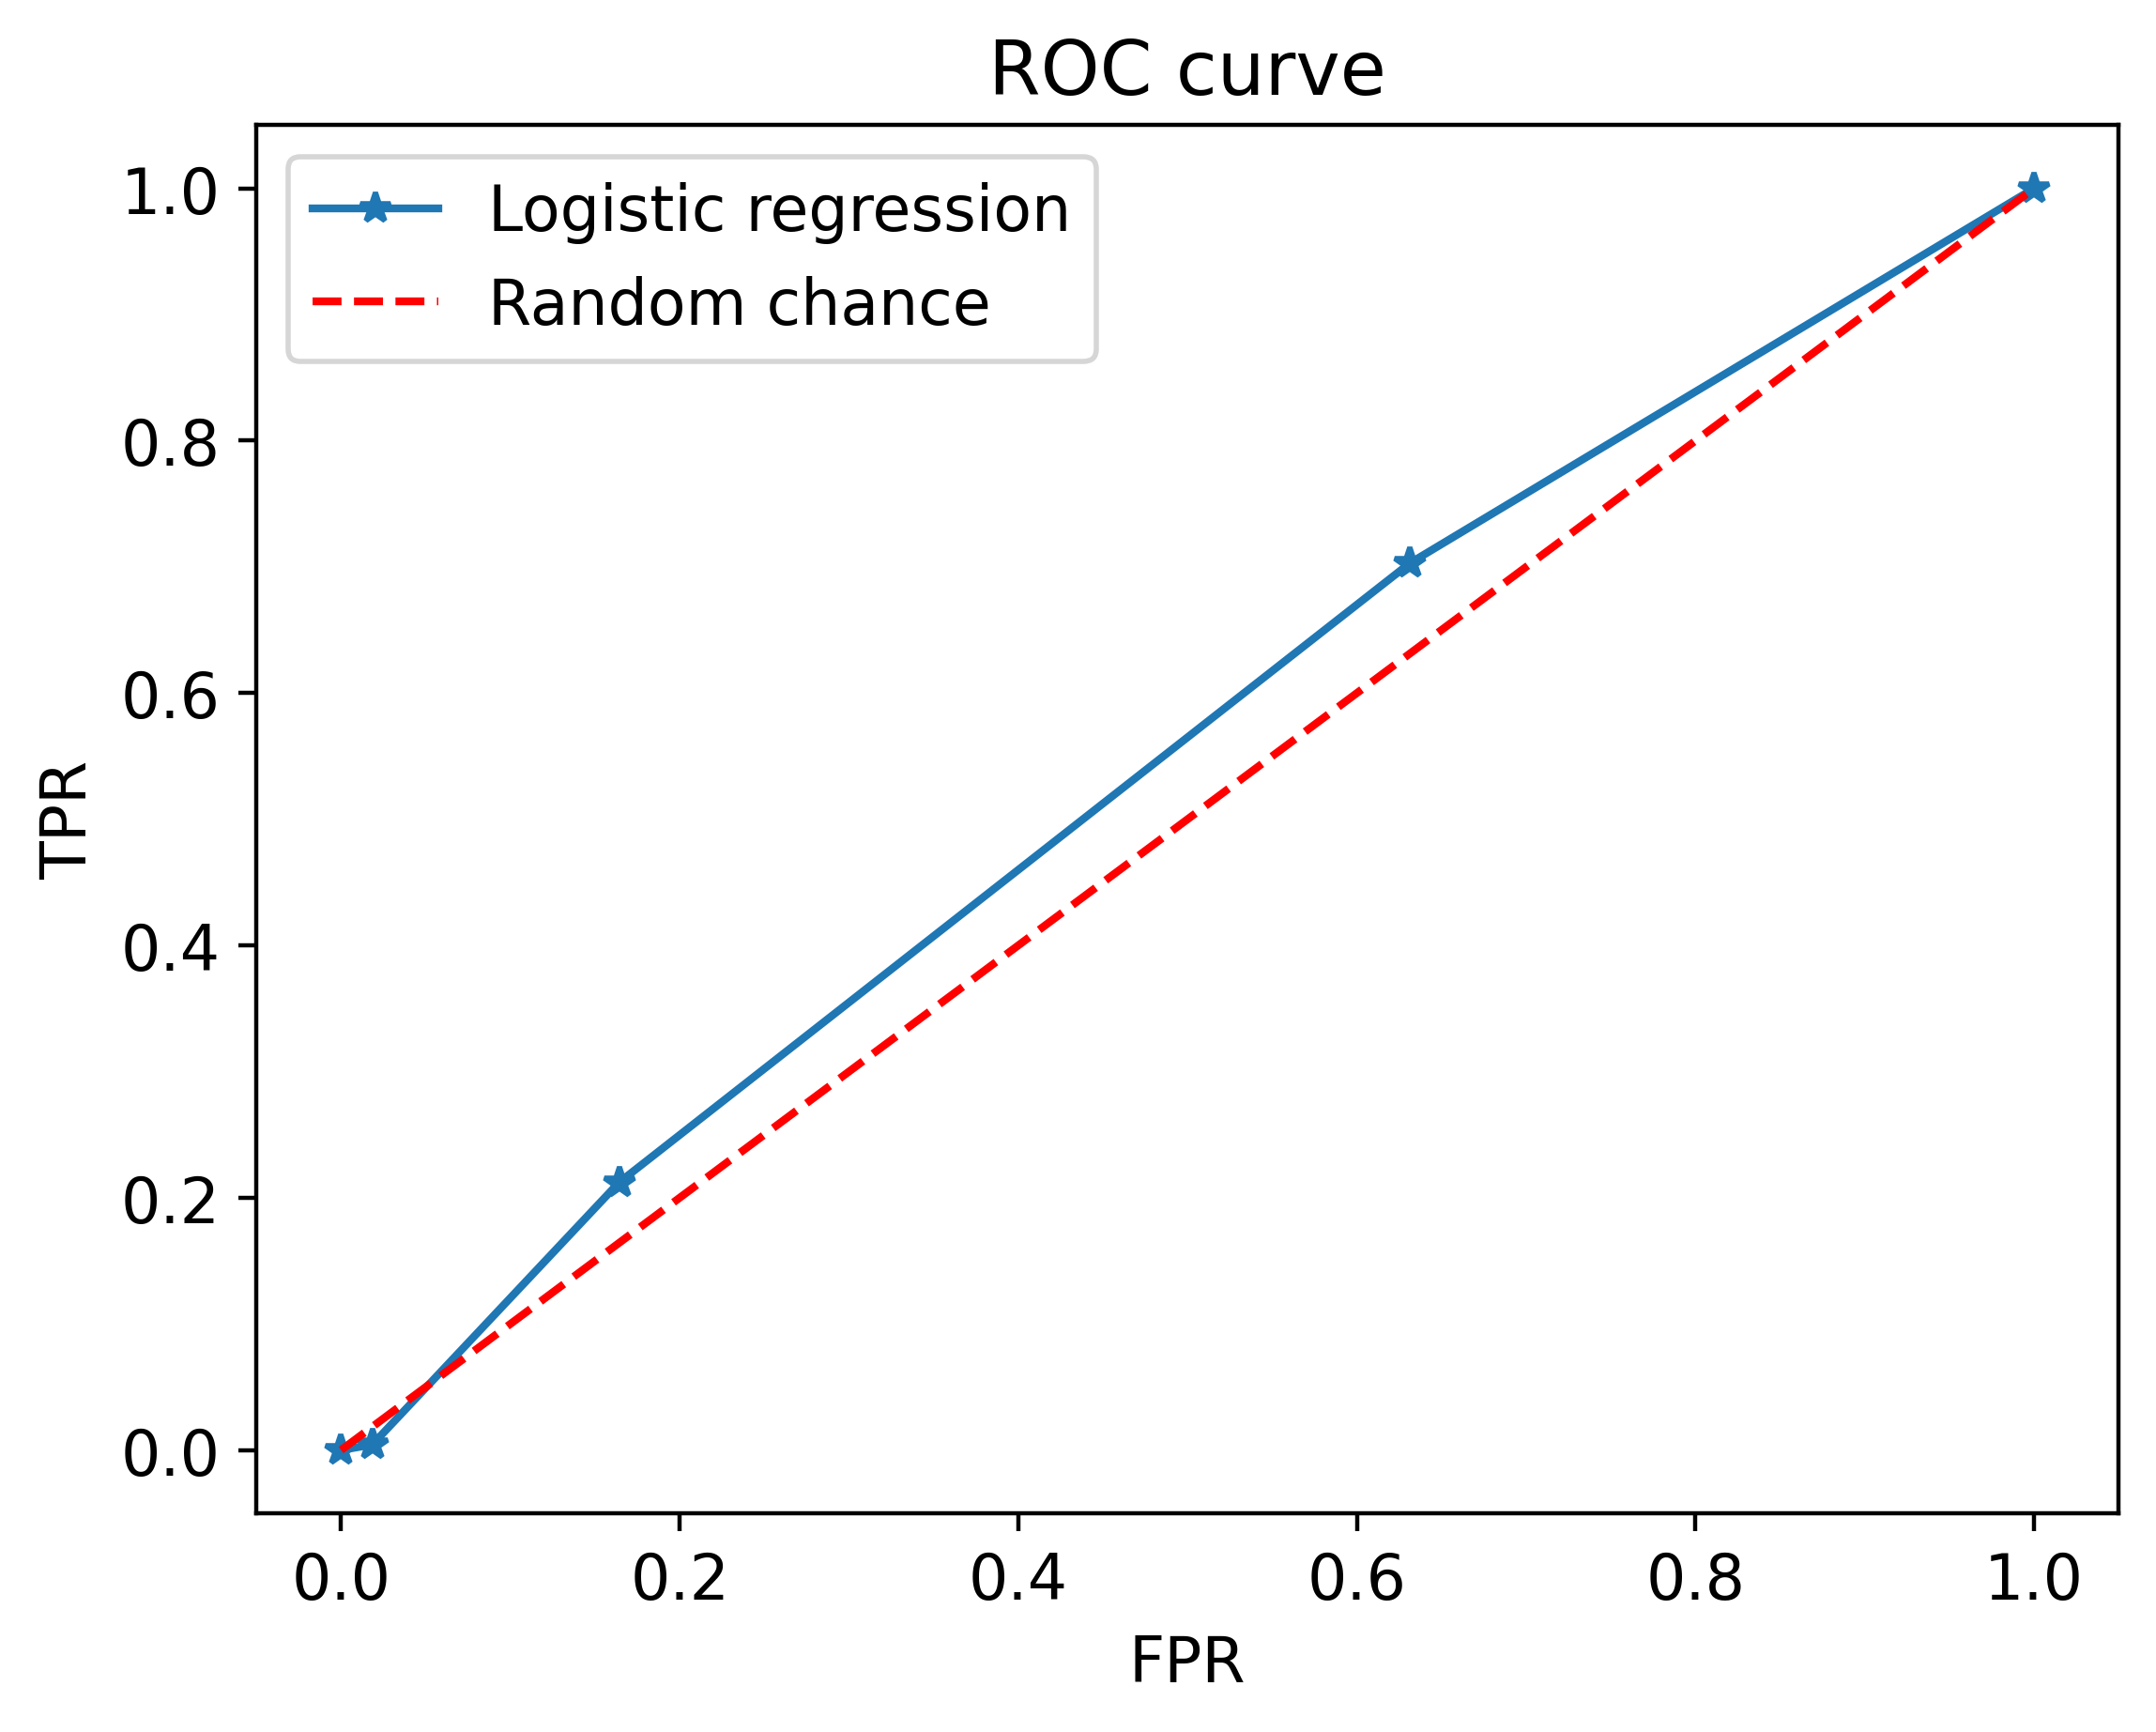

In [61]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [62]:
thresholds

array([       inf, 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [63]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

In [64]:
#PRECISION
#P = TP/TP + FP


PERFORMING LOGISTIC REGRESSION WITH A NEW FEATURE AND CREATING A PRECISION RECALL CURVE

1. TRAIN A LOGISTIC REGRESSION USING FEATURE BESIDES EDUCTAION
2. GRAPHICALLY ACCESS THE TRADEOFF BETWEEN PRECISION AND RECALL.
3. CALCULATE AREA UNDERNEATH A PC CURVE
4. CALCULATE ROC AUC ON BOTH TRAINING AND TESTING SETS AND COMPARE

In [65]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
    test_size=0.2, random_state=24)

In [66]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [67]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [68]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [69]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve( y_test_2, y_test_2_pred_proba [:, 1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

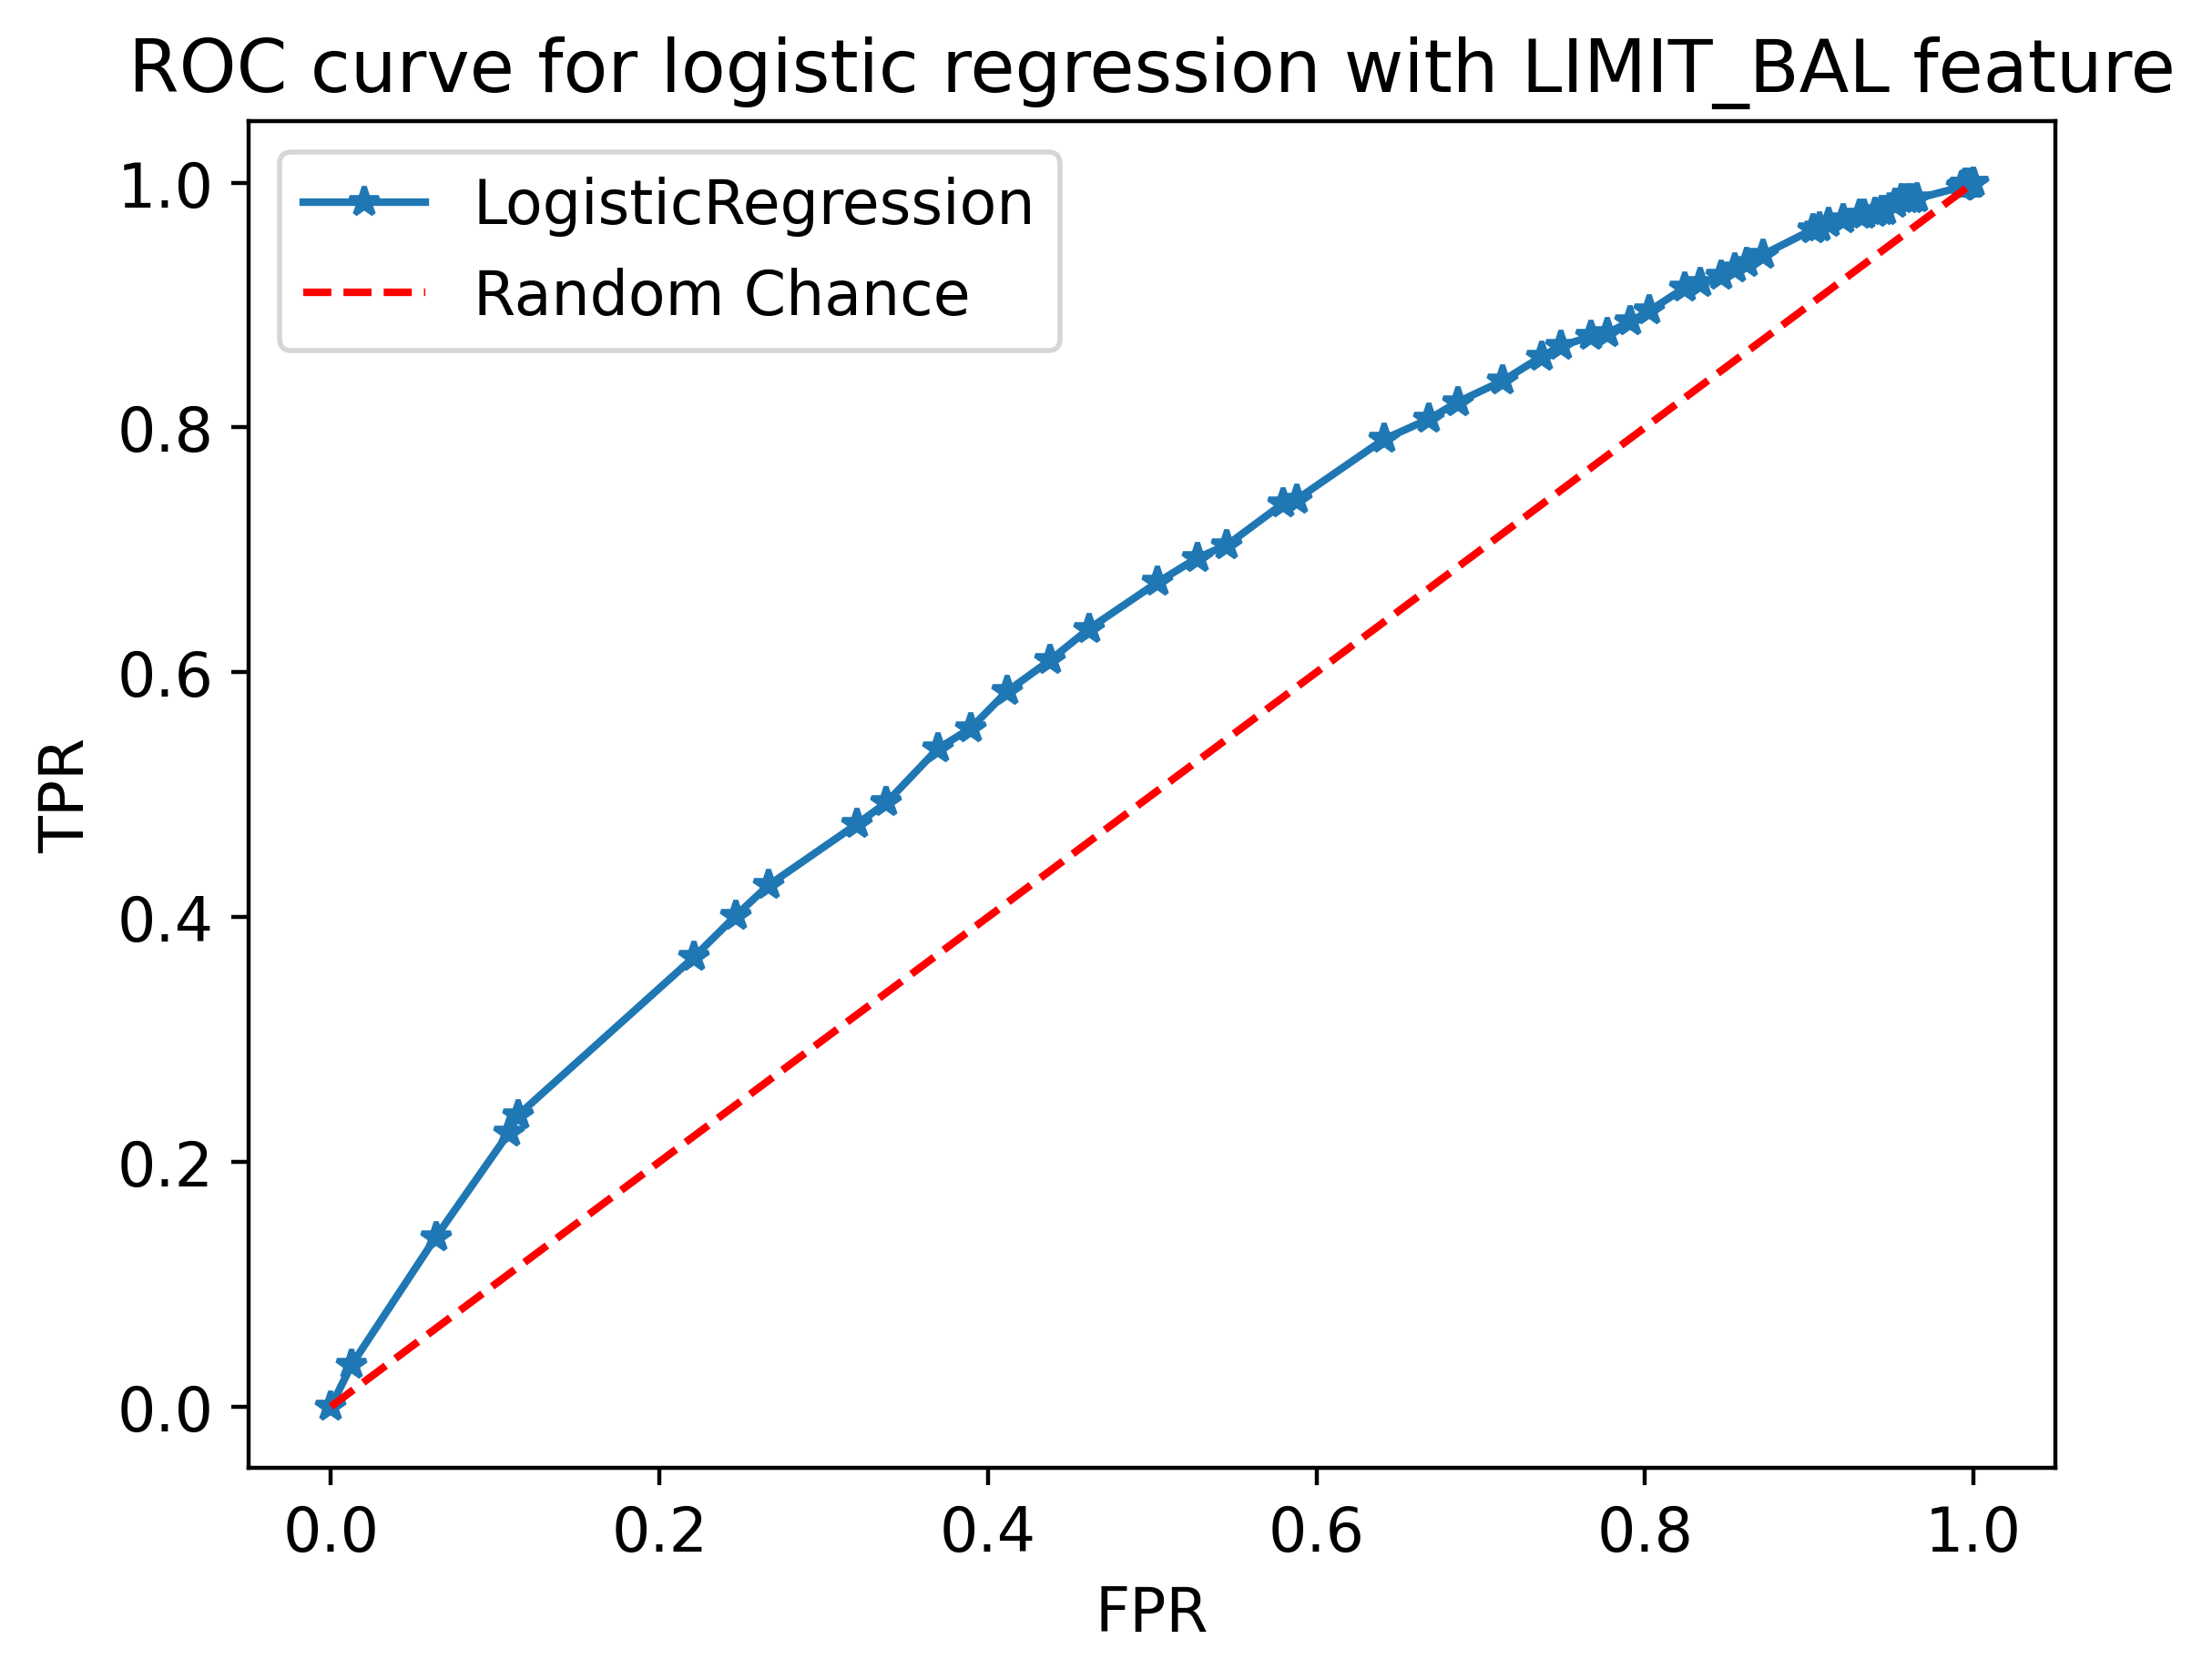

In [70]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['LogisticRegression', 'Random Chance'])
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [71]:
thresholds_2

array([       inf, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [72]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

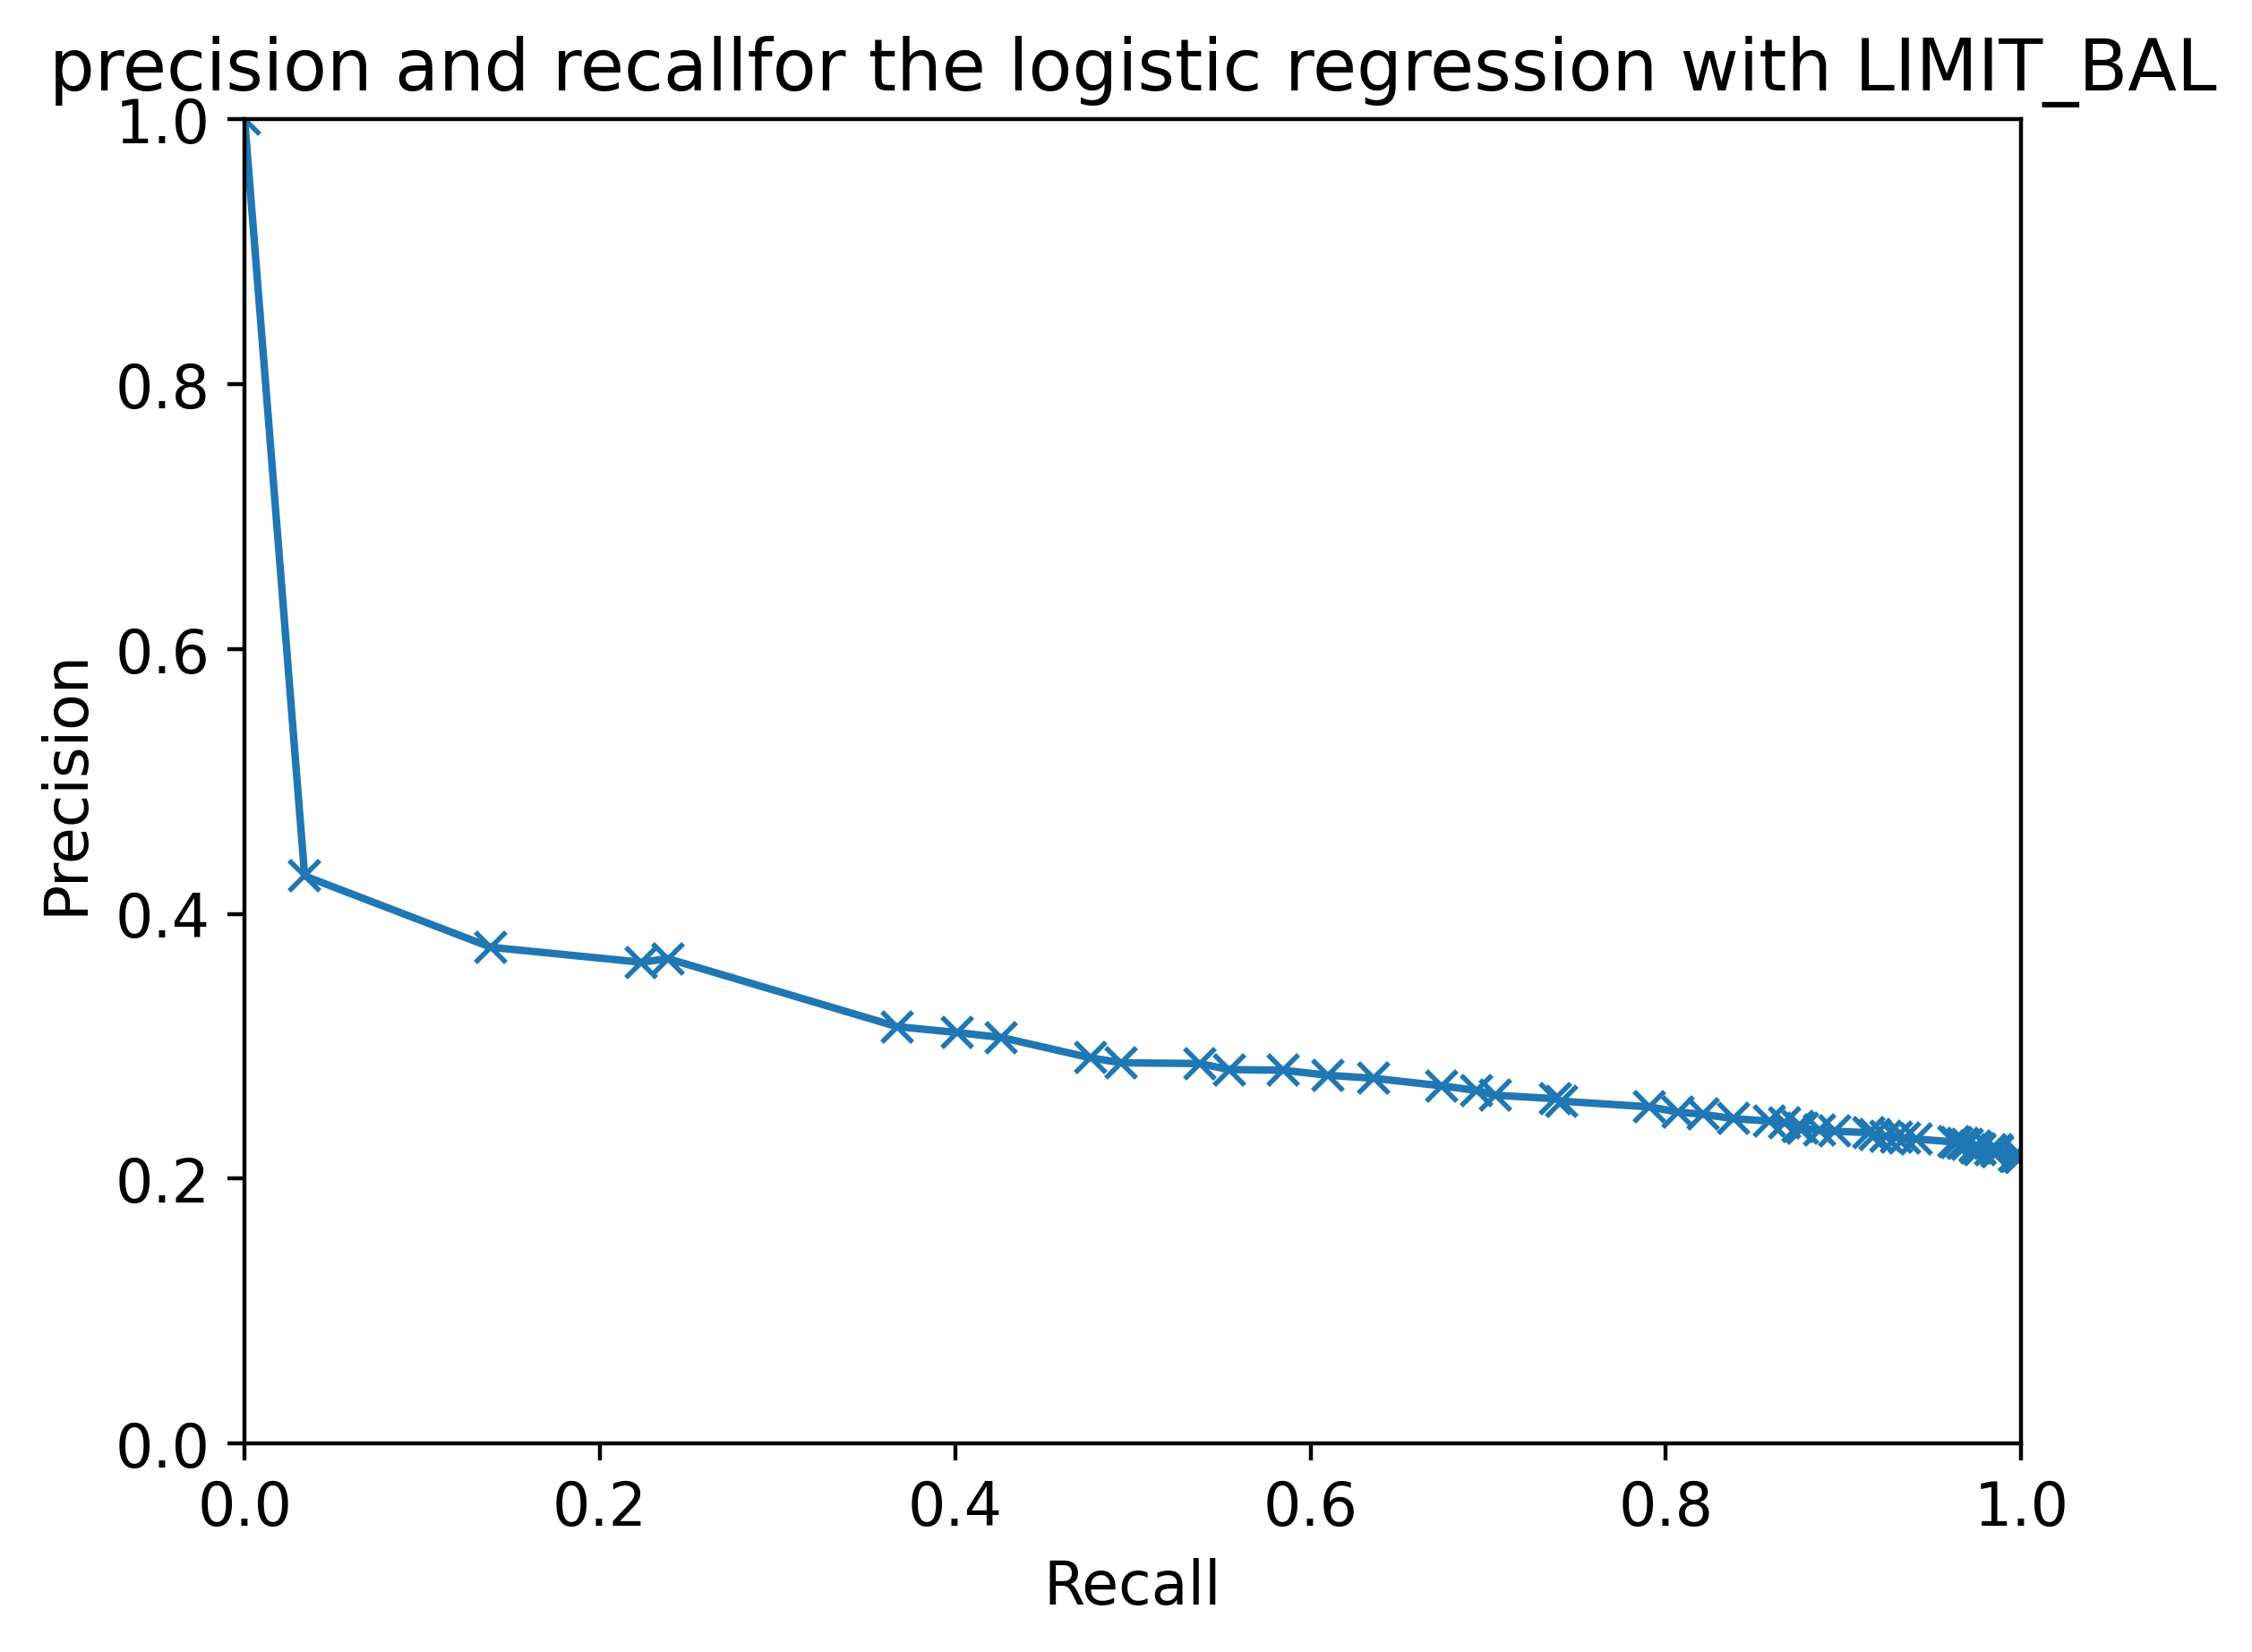

In [73]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision and recallfor the logistic regression with LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])


In [74]:
metrics.auc(recall, precision)

0.31566964427378624

In [75]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)


In [76]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344